# Jupyter configuration

Inline matplotlib plots.

In [48]:
%matplotlib inline

# Python configuration

Import Python modules and set Seaborn as default style.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# Set Seaborn style as default
sns.set()

# Set default figure size
plt.rcParams["figure.figsize"] = (16, 8)

# Python utilities

All functions defined in this section are prefixed with `nb_`.

In [50]:
def nb_str_title(s: str):
    return s.title().replace("_", " ")

def nb_plot_rotate_xlabel(fig, rotation: int):
    fig.set_xticklabels(fig.get_xticklabels(), rotation=rotation)

# Dataset overview

Load sklearn iris dataset and print properties.

In [51]:
iris = load_iris()

print(f"sklearn iris type: {type(iris)}")
print(f"sklearn iris attributes: {dir(iris)}")

print()

print(f"sklearn iris [feature_names] type: {type(iris['feature_names'])}")
print(f"sklearn iris [feature_names] length: {len(iris['feature_names'])}")
print(f"sklearn iris [feature_names] values: {iris['feature_names']}")

print()

print(f"sklearn iris [data] type: {type(iris['data'])}")
print(f"sklearn iris [data] size: {iris['data'].size}")
print(f"sklearn iris [data] shape: {iris['data'].shape}")

print()

print(f"sklearn iris [target_names] type: {type(iris['target_names'])}")
print(f"sklearn iris [target_names] size: {iris['target_names'].size}")
print(f"sklearn iris [target_names] shape: {iris['target_names'].shape}")
print(f"sklearn iris [target_names] values: {iris['target_names']}")

print()

print(f"sklearn iris [target] type: {type(iris['target'])}")
print(f"sklearn iris [target] size: {iris['target'].size}")
print(f"sklearn iris [target] shape: {iris['target'].shape}")

sklearn iris type: <class 'sklearn.utils.Bunch'>
sklearn iris attributes: ['DESCR', 'data', 'feature_names', 'target', 'target_names']

sklearn iris [feature_names] type: <class 'list'>
sklearn iris [feature_names] length: 4
sklearn iris [feature_names] values: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

sklearn iris [data] type: <class 'numpy.ndarray'>
sklearn iris [data] size: 600
sklearn iris [data] shape: (150, 4)

sklearn iris [target_names] type: <class 'numpy.ndarray'>
sklearn iris [target_names] size: 3
sklearn iris [target_names] shape: (3,)
sklearn iris [target_names] values: ['setosa' 'versicolor' 'virginica']

sklearn iris [target] type: <class 'numpy.ndarray'>
sklearn iris [target] size: 150
sklearn iris [target] shape: (150,)


# DataFrame conversion

Convert sklearn `Bunch` dataset to pandas `DataFrame` format and print a random sample.

In [52]:
# Convert sklearn Bunch object to a pandas DataFrame object
df_data = np.c_[iris["data"], iris["target"]]
df_columns: object = iris["feature_names"] + ["target"]
df = pd.DataFrame(data=df_data, columns=df_columns)

# Set DataFrame index column name
df.index.name = "index"

# Rename columns
df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
}, inplace=True)

# Move the last [target] column to the first position
df_columns = df.columns.tolist()
df_columns = df_columns[-1:] + df_columns[:-1]
df = df[df_columns]

# Convert [target] column to a category
df.target = df.target.astype(int)
df.target = df.target.apply(str)
df.target = df.target.map({"0": "setosa", "1": "versicolor", "2": "virginica"})
df.target = df.target.astype("category")

# Print properties and a random sample
df.info()
df.sample(10).sort_values(by=df.index.name)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
target          150 non-null category
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: category(1), float64(4)
memory usage: 5.0 KB


,target,sepal_length,sepal_width,petal_length,petal_width
index,,,,,
38,setosa,4.4,3.0,1.3,0.2
48,setosa,5.3,3.7,1.5,0.2
49,setosa,5.0,3.3,1.4,0.2
53,versicolor,5.5,2.3,4.0,1.3
54,versicolor,6.5,2.8,4.6,1.5
58,versicolor,6.6,2.9,4.6,1.3
76,versicolor,6.8,2.8,4.8,1.4
77,versicolor,6.7,3.0,5.0,1.7
141,virginica,6.9,3.1,5.1,2.3


# Exploratory Data Analysis (EDA)

## Features overview

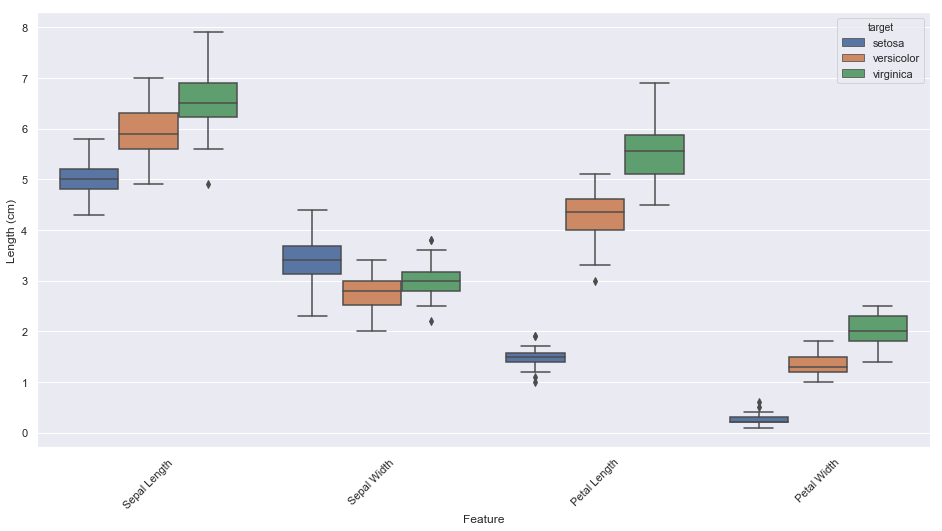

In [53]:
df_melt = pd.melt(
    frame=df,
    id_vars="target",
    value_vars=[
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
    ]
)
df_melt.index.name = "index"
df_melt.variable = df_melt.variable.apply(nb_str_title)

fig = sns.boxplot(x="variable", y="value", hue="target", data=df_melt)
nb_plot_rotate_xlabel(fig, rotation=45)

plt.xlabel("Feature")
plt.ylabel("Length (cm)")

plt.show(fig)